In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# VERİ SETİ İMPORT

In [2]:
df = pd.read_excel('DB 1_-0.xlsx', engine='openpyxl') #encode edilmiş veri seti

In [3]:
df2 = df.loc[:, 'Mac Sonucu 1':]

In [4]:
# df3 = df2.to_numpy()

In [5]:
%matplotlib inline
plt.style.use("ggplot")

# GRAFİK TABLO VERİLERİNİN OLUŞTURULMASI

In [6]:
def Grafik_Verileri(df, kaynak_column, kaynak_value, target_targetcolumn, target_targetcolumn_value):
    target = df[df[kaynak_column]==kaynak_value] #bir sütundaki verilere göre bütün verier
    target=target.rename(index={j: i for i, j in enumerate(target.index)}) #indexler yeniden sıralandı
    target_clm = target.value_counts(target_targetcolumn)
    
    return target_clm[target_targetcolumn_value]


In [7]:
target_columns =df2.columns

def Tablolastirma(df, kaynak_col, target_columns):
    Sontable = []
    for trg_clm in target_columns:
        try:
            val = Grafik_Verileri(df=df, kaynak_column=kaynak_col, kaynak_value=1, target_targetcolumn=trg_clm, target_targetcolumn_value=1)
            Sontable.append(val)
        except:
            val = 0
            Sontable.append(val)
    Sontable = pd.DataFrame(Sontable, index=df2.columns, columns=[kaynak_col])
    return Sontable
    

In [8]:
Sontable = pd.DataFrame()
for cl in target_columns:
    table = Tablolastirma( df=df2, kaynak_col=cl, target_columns=target_columns)
    Sontable =pd.concat([Sontable, table],axis=1)

In [ ]:
# Graik veri tablosunun excele dönüştürülmesi
from os import path
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "GrafikVerileri.xlsx")
#Sontable.to_excel(path)

# ÇAPRAZ SÜTUNLARIN GRAFİĞİ

# pie

In [13]:
def GrafikPie(kind, satirText, sutunBas, columnBas, columnBit, title, color):
    try:
        Sontable.loc[sutunBas, columnBas:columnBit].plot(kind=kind, subplots=True, colors=color, startangle = 90, autopct='%.2f', labeldistance=None) #
        plt.legend(bbox_to_anchor=(0.70, 1.02), loc='upper left')
        plt.suptitle(title);
        text = satirText+' '+sutunBas
        plt.savefig('{}--{}.png'.format(kind, text.replace('/','-')), dpi=400)
        plt.show()
        plt.close()
    except:
        plt.close()
        pass

In [14]:
for i in Sontable.columns:
    sutunBas  = i
    
    kind = 'pie'
    columnBas = "İlk Yarı 1 Maç 0"
    columnBit = "İlk Yarı 0 Maç 2"
    satirText = 'İlk Yarı/Maç Sonucu'
    color = ['Cyan','Yellow','Red','Blue','Teal','Purple','Green','Pink','Grey','White']
    title     = '{}-{}--{}'.format(kind, satirText, sutunBas)
    
    #GrafikPie(kind=kind, satirText=satirText, sutunBas=sutunBas, columnBas=columnBas, columnBit=columnBit, title=title, color=color)


# bar

In [15]:
def GrafikBar(df, satirText, sutunBas, columnBas, columnBit, title, color):
    try:
        Sontable.loc[sutunBas, columnBas:columnBit].plot.bar(color=color)
        
        dt = Sontable.loc[sutunBas, columnBas:columnBit]
        lg = len(dt.index)
        for i, v in enumerate(zip(range(lg), dt)):
            if not v[1]:
                continue
            plt.text(i,v[1],  str(v[1]), fontsize='small', ha = 'center')
            
        #plt.ylabel(sutunBas)
        target = df.loc[df[sutunBas]==1]
        plt.xlabel(str(len(df))+' Karşılaşma, '+str(len(target))+' '+sutunBas)
        plt.suptitle(title);
        textt = str(satirText)+' '+str(sutunBas)
        kind = 'bar'
        plt.savefig('{}--{}.png'.format(kind, textt.replace('/','-')), dpi=400, bbox_inches='tight')
        plt.show()
        plt.close()
    except:
        plt.close()
        pass

In [16]:
for i in Sontable.columns:
    sutunBas  = i
    
    columnBas = "İlk Yarı 1 Maç 0"
    columnBit = "İlk Yarı 0 Maç 2"
    satirText = 'İlk Yarı/Maç Sonucu'
    color = ['Red','Blue','Teal','Purple','Yellow','Green','Pink','Grey','White']
    title     = '{}--{}'.format(satirText, sutunBas)
    
    #GrafikBar(df=df2, satirText=satirText, sutunBas=sutunBas, columnBas=columnBas, columnBit=columnBit, title=title, color=color)


# TOPLAM GELEN MAÇLARIN GRAFİKLERİ

In [151]:
ToplamKazananlar = []
for i, m in enumerate(Sontable.columns):
    ToplamKazananlar.append(Sontable[m][i])

ToplamKazananlar=pd.DataFrame(data=ToplamKazananlar,index=Sontable.columns,columns=["ToplamKazananlar"])

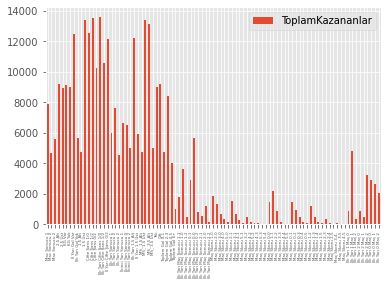

In [32]:
ToplamKazananlar.plot.bar()
plt.suptitle('title')
plt.xticks(fontsize=4)
#plt.savefig('ToplamKazandıranlar.png', dpi=400, bbox_inches='tight')

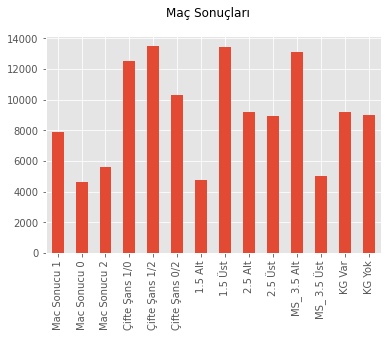

In [143]:
MS1 = ToplamKazananlar[:3]
MS2 = ToplamKazananlar[11:14]
MS3 = ToplamKazananlar[9:11]
MS4 = ToplamKazananlar[3:5]
MS5 = ToplamKazananlar[27:29]
MS6 = ToplamKazananlar[5:7]
MS = pd.concat([MS1,MS2,MS3,MS4,MS5,MS6],axis=0)
MS.plot.bar()
plt.suptitle('Maç Sonuçları')
plt.legend().remove()
#plt.savefig('Maç Sonuçları.png', dpi=400, bbox_inches='tight')

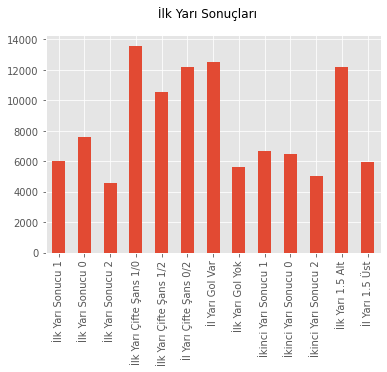

In [144]:
IY1 = ToplamKazananlar[17:20]
IY2 = ToplamKazananlar[14:17]
IY3 = ToplamKazananlar[7:9]
IY4 = ToplamKazananlar[20:23]
IY5 = ToplamKazananlar[23:25]
IY = pd.concat([IY1,IY2,IY3,IY4,IY5],axis=0)
IY.plot.bar()
plt.suptitle('İlk Yarı Sonuçları')
plt.legend().remove()
#plt.savefig('İlk Yarı Sonuçları.png', dpi=400, bbox_inches='tight')

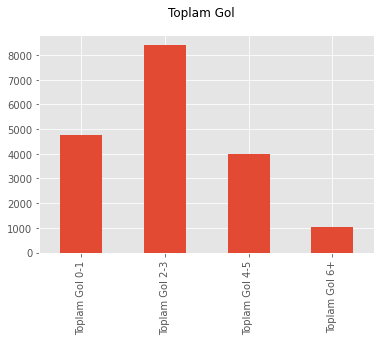

In [145]:
TG = ToplamKazananlar[31:35]
TG.plot.bar()
plt.suptitle('Toplam Gol')
plt.legend().remove()
#plt.savefig('Toplam Gol.png', dpi=400, bbox_inches='tight')

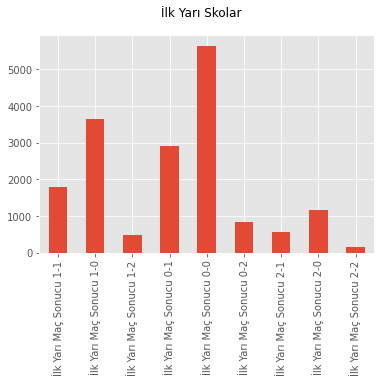

In [146]:
IYSKR = ToplamKazananlar[35:44]
IYSKR.plot.bar()
plt.suptitle('İlk Yarı Skolar')
plt.legend().remove()
#plt.savefig('İlk Yarı Skolar', dpi=400, bbox_inches='tight')

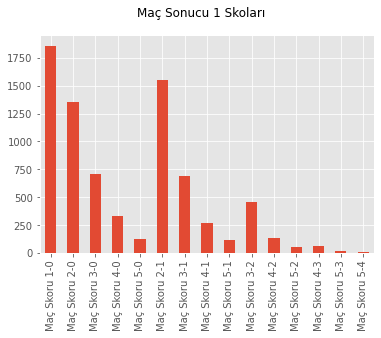

In [147]:
MSSKR_1 = ToplamKazananlar[44:59]
MSSKR_1.plot.bar()
plt.suptitle('Maç Sonucu 1 Skoları')
plt.legend().remove()
#plt.savefig('Maç Sonucu 1 Skoları', dpi=400, bbox_inches='tight')

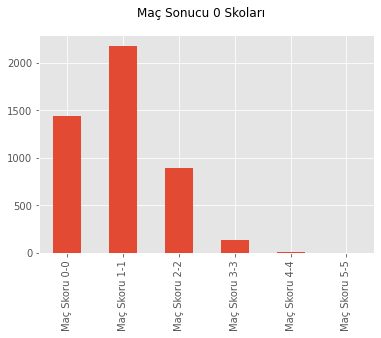

In [148]:
MSSKR_0 = ToplamKazananlar[59:65]
MSSKR_0.plot.bar()
plt.suptitle('Maç Sonucu 0 Skoları')
plt.legend().remove()
#plt.savefig('Maç Sonucu 0 Skoları', dpi=400, bbox_inches='tight')

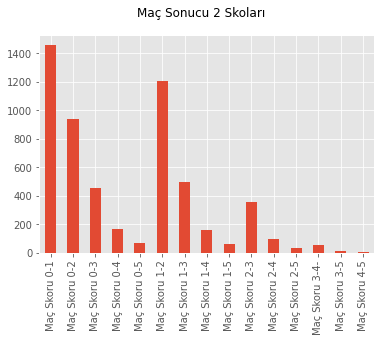

In [149]:
MSSKR_2 = ToplamKazananlar[65:80]
MSSKR_2.plot.bar()
plt.suptitle('Maç Sonucu 2 Skoları')
plt.legend().remove()
#plt.savefig('Maç Sonucu 2 Skoları', dpi=400, bbox_inches='tight')

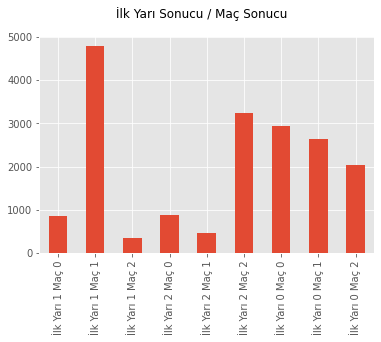

In [150]:
IY_MS = ToplamKazananlar[80:]
IY_MS.plot.bar()
plt.suptitle('İlk Yarı Sonucu / Maç Sonucu')
plt.legend().remove()
#plt.savefig('İlk Yarı Sonucu - Maç Sonucu', dpi=400, bbox_inches='tight')

# KAZANAN ORANLARIN GRAFİK ÇALIŞMALARI

In [3]:
df = pd.read_excel('DB_ALL_scrap.xlsx', engine='openpyxl') #kazınmış veri seti import

In [4]:
def PivotGelenOranlar(column, df):
    GelenOranlar    = []
    for indx in df[column]:
        if indx !='' and indx !='-': 
            idda = re.search("(?<=\\[).*?(?=\\])", str(indx)) # [] parantez içindeki oran
            if idda:
                idda = idda.group()
                GelenOranlar.append(float(idda))
    GelenOranlar = pd.DataFrame(data=GelenOranlar,index=range(len(GelenOranlar)), columns=[column])
    return GelenOranlar

In [5]:
GelenOranlartable = []
for clm in df.columns[8:]:
    t = PivotGelenOranlar(column=clm, df=df)
    if not t.empty:
        GelenOranlartable.append(t)


In [149]:
def GrafikBoxPlot(df, indx, clmname):
    df[indx].plot.box(widths = 0.5, zorder = 1, patch_artist=True)
    plt.yticks(range(30));
    plt.tick_params(axis='y', colors='red')
    plt.grid()
    plt.tick_params(axis='x', colors='red')
    plt.ylabel('Oran Aralıkları', color='red')
    plt.savefig(clmname, dpi=400, bbox_inches='tight')

In [1]:
for i, n in enumerate(GelenOranlartable):
    clmname = str(GelenOranlartable[i].columns.values).replace('/','-').replace('.','-')
    print(clmname)
    #GrafikBoxPlot(df=GelenOranlartable, indx=i, clmname=clmname)

NameError: name 'GelenOranlartable' is not defined

In [27]:
len(y)

4646